# Week 11

### Week 11, Monday

#### Gross-Pitaevskii equation

Starting with the Lagrangian of the relativistic "$\phi^4$"-theory (without the electromagnetic field)
$$
\mathcal{L}(\phi,\phi^*,\partial_\mu\phi,\partial_\mu\phi^*) = \partial_\mu \phi^*\, \partial^\mu \phi -m^2|\phi|^2 -\frac{g}{2}|\phi|^4\,,
$$
we can take the nonrelativistic limit by factoring out the oscillatory rest mass energy term
$$
\phi({\bf r}, t) = \psi({\bf r},t)e^{-imc^2t/\hbar}\,,\qquad |\hbar \partial_t\psi({\bf r},t)| \ll mc^2 |\psi({\bf r},t)|\,.
$$
From now on we reinstate explicitly the Planck's constant $\hbar$ and the speed of light $c$. By retaining only the zeroth order term in an expansion in powers of $c^{-2}$, we obtain the nonrelativistic Lagrangian
$$
\mathcal{L}(\psi,\psi^*,\partial_\mu\psi,\partial_\mu\psi^*) = i\hbar \psi^*\partial_t\psi - \frac{\hbar^2}{2m}|\nabla_{\bf r} \psi|^2 -\frac{g}{2}|\psi|^4\,.
$$
<font color='red'>Using the Euler-Lagrange equations, it is easy to see that the equation motion for the field $\psi({\bf r}, t)$ is</font>
$$
i\hbar \partial_t \psi = -\frac{\hbar^2}{2m}\nabla^2_{\bf r}\psi + g|\psi|^2\psi\,.
$$
This is similar to the Schrödinger equation, the only difference being that there is an additional nonlinear term $g|\psi|^2\psi$. Therefore, this particular equation of motion is called the *nonlinear Schrödinger equation* or the *Gross-Pitaevskii equation*, from Eugene P. Gross and Lev Petrovich Pitaevskii who independently introduced it in 1961. It is also common to include an arbitrary potential $V({\bf r})$. This is done adding a term of the form $-V({\bf r})|\psi({\bf r}, t)|^2$ to the Lagragian. Then, the Gross-Pitaevskii equation reads
$$
i\hbar \partial_t \psi({\bf r},t) = -\frac{\hbar^2}{2m}\nabla^2_{\bf r}\psi({\bf r},t) + V({\bf r})\psi({\bf r},t)+ g|\psi({\bf r},t)|^2\psi({\bf r},t)\,.
$$
This is the form that is commonly employed to describe *Bose-Einstein condensates* realized with ultracold atomic gases.

As in the relativistic case, the nonrelativistic Lagrangian is invariant under global gauge transformations. <font color='red'>Derive the conserved Noether current associated to global gauge transformation from the above nonrelativistic Lagrangian.

#### One-dimensional time-dependent Gross-Pitaevskii equation

Below are a few python codes (written by ChatGPT) that solve the one-dimensional time-dependent Gross-Pitaevskii equation. All codes are variations of the one and the same code, designed for analyzing a few specific scenarios.

The time evolution of the equation is solved using split-step Fourier method. The method is based on the idea of splitting the Hamiltonian of a system into two or more parts, each corresponding to a different physical process, and then evolving the system separately under each part for a short time interval. Here the Gross-Pitaevskii equation is split into the kinetic energy part $K$ and the potential energy part (including the nonlinear interaction part) $V$. The split-operator method assumes that the time evolution operator $U(t)$ for a short time interval $\Delta t$ can be approximated as a product of the separate time evolution operators for each component of the Hamiltonian:
$$
U(\Delta t) ≈ U_V(\Delta t/2) U_T( \Delta t) U_V(\Delta t/2)
$$
where $U_T(\Delta t)$ and $U_V(\Delta t)$ are the time evolution operators corresponding only to the kinetic and potential energy components separately. The method alternates between applying the potential and kinetic operators over small time steps, effectively decoupling the spatial and momentum space dynamics. The kinetic energy operator is diagonal in momentum space, where as the interaction is diagonal in the position space. Utilizing fast fourier transform to switch between the momentum and position spaces, the method can propagate the wave function over multiple time steps in a numerically efficient way.

The first version of the code calculates the time-evolution of a Bose-Einstein condensate in a harmonic trap with the initial condition in which the BEC has a width that is 'too big' for the trap. 
- <font color="red">Read the code and identify the initial condition and the split-operator time evolution parts in the code. 
- <font color="red">Observe the result of the calculations showing the 'breathing mode', in which the condensate shrinks and expands. 
- <font color="red">You can vary the parameters, for example shifting the initial state away from the center of the trap to see also the dipole-like oscillation mode. 
- <font color="red">See also the effect of interactions by increasing the parameter $g$ to for example $g=2$. Notice how introduction of nonlinearity in the form of interparticle interactions leads into interference effects.
- <font color="red">You can also try attractive interactions by using negative values of $g$. For strong attractive interactions the Bose-Einstein condensate may lead into famous Bosenova, in which the gas collapses, forming a dense core of tightly bound atom pairs and an exploding halo of highly energetic atoms, in a supernova-like event. The Gross-Pitaevskii equation cannot fully describe the effect though since it only considers the condensate wavefunction. But Gross-Pitaevskii equation does produce at least self-trapping effect, in which attractive interaction can hold the gas together even in absence of an external trapping potential (which you can switch off by setting omega to zero). </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['text.usetex'] = True

# Parameters
N = 1024
L = 100
dx = L / N
dt = 0.001
T = 500
m = 1
hbar = 1
g = 0 ## two-particle interaction strength
x = np.linspace(-L / 2, L / 2, N)

# Trapping potential (harmonic oscillator)
omega= 0.1
Vtrap = 0.5 * m * omega**2 * x**2

if omega != 0:
    rosc = np.sqrt(hbar/(m*omega)) ## the harmonic oscillator length scale
else:
    rosc = 20

# Initial wave function (Gaussian)
a = rosc/4 ## initial width.
psi0 = np.exp(-(x)**2 / (2 * a**2)) # gaussian
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx)

# Discretized kinetic and potential operators
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
K = np.exp(-0.5j * (hbar * k**2 / m) * dt)
V = np.exp(-1j * Vtrap * dt / hbar)
G = 1j * g * dt / hbar

# Time evolution
psi = psi0

## Make a bunch of line plots

#number_of_plots = 5

#fig, axs = plt.subplots(number_of_plots+1, sharex=True, sharey=True)
#axs[0].plot(x, np.abs(psi)**2)

#for idx in range(number_of_plots):
#    for _ in range(T):
#        psi = np.fft.ifft(K * np.fft.fft(V * (1 - G * np.abs(psi)**2) * psi))
#    axs[idx+1].plot(x, np.abs(psi)**2)
    
#plt.xlabel('x')
#plt.xlim(-20,20)
#plt.ylabel('Density')
#plt.show()


## Make an animation

fig = plt.figure()
ax = plt.axes(xlim=(-20, 20), ylim=(0.0, 0.9))

line, = ax.plot([])

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num):
    global psi
    for _ in range(T):
        psi = np.fft.ifft(K * np.fft.fft(V * (1 - G * np.abs(psi)**2) * psi))    
    line.set_data(x,np.abs(psi)**2)
    return (line,)


anim = animation.FuncAnimation(fig,animate,init_func=init,frames=300,interval=250)
HTML(anim.to_html5_video())       



The next piece of code solves the ground state of the condensate using imaginary time propagation. In the method, the time variable $t$ is replaced with imaginary time $\tau = it$ which turns the time-dependent Schrödinger equation into a diffusion equation. The method effectively suppresses the excited state components, leaving the ground state as the dominant component of the wave function. The wave function is renormalized at each iteration to prevent divergence. After a sufficient number of iterations, the method converges to the ground state of the system.
- <font color="red">Study the code to see the imaginary time propagation and use it for solving the ground state of the harmonic oscillator.
- <font color="red">try also the effect of interactions $g$.
- <font color="red">you can also try changing the harmonic trapping potential into some other functional form

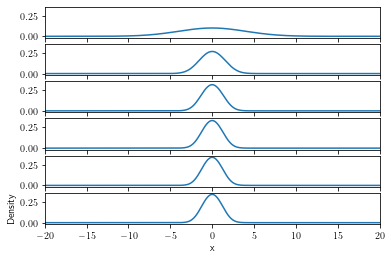

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['text.usetex'] = True

# Parameters
N = 1024
L = 100
dx = L / N
dt = 0.001
dtau = -0.001j # imaginary time step
T = 1000
m = 1
hbar = 1
g = 1
x = np.linspace(-L / 2, L / 2, N)

n0 = 1/L

# Trapping potential (harmonic oscillator)
omega = 0.5
Vtrap = 0.5 * m * omega**2 * x**2

if omega != 0:
    rosc = np.sqrt(hbar/(m*omega))
else:
    rosc = 20

# Initial wave function (Gaussian)
a = rosc*4
psi0 = np.exp(-x**2 / (2 * a**2)) # gaussian
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx)

# Discretized kinetic and potential operators
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
K = np.exp(-0.5j * (hbar * k**2 / m) * dt)
V = np.exp(-1j * Vtrap * dt / hbar)
G = 1j * g * dt / hbar

imK = np.exp(-0.5j * (hbar * k**2 / m) * dtau)
imV = np.exp(-1j * Vtrap * dtau / hbar)
imG = 1j * g * dtau / hbar

# Time evolution
psi = psi0



## Make a bunch of line plots

number_of_plots = 5

fig, axs = plt.subplots(number_of_plots+1, sharex=True, sharey=True)
axs[0].plot(x, np.abs(psi)**2)

for idx in range(number_of_plots):
    for _ in range(T):
        psi = np.fft.ifft(imK * np.fft.fft(imV * (1 - imG * np.abs(psi)**2) * psi))
        psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)  # Renormalize the wave function
    axs[idx+1].plot(x, np.abs(psi)**2)

plt.xlabel('x')
plt.xlim(-20,20)
plt.ylabel('Density')
plt.show()


## Make an animation

#fig = plt.figure()
#ax = plt.axes(xlim=(-20, 20), ylim=(0.0, 0.3))

#line, = ax.plot([])

#def init():
#    line.set_data([], [])
#    return (line,)

#def animate(frame_num):
#    global psi
#    for _ in range(T):
#        psi = np.fft.ifft(imK * np.fft.fft(imV * (1 - imG * np.abs(psi)**2) * psi))
#        psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)  # Renormalize the wave function
#    line.set_data(x,np.abs(psi)**2)
#    return (line,)


#anim = animation.FuncAnimation(fig,animate,init_func=init,frames=100,interval=250)
#HTML(anim.to_html5_video())       

Finally, lets analyze a few interesting cases of time evolution. In the code below, there are a few initial states for which you can simulate the time-evolution.
- <font color="red">Gaussian with a hole-initial state involves a gaussian wave packet but with a small hole (zero density). Observe how the dip is filled in the time evolution.
- <font color="red">In contrast, Gaussian with a soliton, involves a similar dip in the density but in this ansatz also the phase of the wave function is flipped at the zero of the density. This is called a dark soliton and it is a topological defect in the condensate. It is stable in the time evolution, although it may move.
- <font color="red">Two gaussians (for this you may want to increase the harmonic trapping frequency omega to, say, 0.4) shows the interference of two colliding condensates



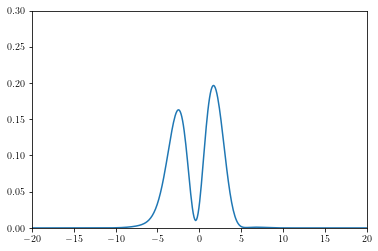

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['text.usetex'] = True

# Parameters
N = 1024
L = 100
dx = L / N
dt = 0.001
T = 500
m = 1
hbar = 1
g = 1
x = np.linspace(-L / 2, L / 2, N)

n0 = 1/L
healinglength = hbar/np.sqrt(2*m*g*n0)

# Trapping potential (harmonic oscillator)
omega = 0.1
Vtrap = 0.5 * m * omega**2 * x**2

if omega != 0:
    rosc = np.sqrt(hbar/(m*omega))
else:
    rosc = 20

# Initial wave function (Gaussian)
a = rosc*2
#psi0 = np.abs(np.tanh((x-1)/(np.sqrt(2)*healinglength)))*np.exp(-x**2 / (2 * a**2)) #gaussian with a hole
psi0 = np.tanh((x-1)/(np.sqrt(2)*healinglength))*np.exp(-x**2 / (2 * a**2)) #gaussian with a soliton
#psi0 = np.exp(-(x-7)**2 / (2 * a**2)) #one shifted gaussians
#psi0 = np.exp(-(x-7)**2 / (2 * a**2)) + np.exp(-(x+7)**2 / (2 * a**2)) #two gaussians
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx)

# Discretized kinetic and potential operators
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
K = np.exp(-0.5j * (hbar * k**2 / m) * dt)
V = np.exp(-1j * Vtrap * dt / hbar)
G = 1j * g * dt / hbar

# Time evolution
psi = psi0

## Make a bunch of line plots

#number_of_plots = 5

#fig, axs = plt.subplots(number_of_plots+1, sharex=True, sharey=True)
#axs[0].plot(x, np.abs(psi)**2)

#for idx in range(number_of_plots):
#    for _ in range(T):
#        psi = np.fft.ifft(K * np.fft.fft(V * (1 - G * np.abs(psi)**2) * psi))
#    axs[idx+1].plot(x, np.abs(psi)**2)
    
#plt.xlabel('x')
#plt.xlim(-20,20)
#plt.ylabel('Density')
#plt.show()


## Make an animation

fig = plt.figure()
ax = plt.axes(xlim=(-20, 20), ylim=(0.0, 0.3))

line, = ax.plot([])

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num):
    global psi
    for _ in range(T):
        psi = np.fft.ifft(K * np.fft.fft(V * (1 - G * np.abs(psi)**2) * psi))    
    line.set_data(x,np.abs(psi)**2)
#    line.set_data(x,psi.real)
    return (line,)


anim = animation.FuncAnimation(fig,animate,init_func=init,frames=100,interval=250)
HTML(anim.to_html5_video())       

#### Quantization

We can readily apply the canonical quantization procedure to the above nonrelativistic Lagrangian. The generalized momentum conjugate to $\psi$ is
$$
\pi = \frac{\partial \mathcal{L}}{\partial (\partial_t \psi)} = i\hbar \psi^*\,.
$$
As usual the fields $\psi$ and $\pi$ are promoted to operators satisfying the canonical commutation relations
$$
[\hat{\psi}({\bf r}),\hat{\pi}({\bf r}')] = i\hbar \delta^{(3)}({\bf r}-{\bf r}')\,,\qquad [\hat{\psi}({\bf r}),\hat{\psi}({\bf r}')] = [\hat{\pi}({\bf r}),\hat{\pi}({\bf r}')] = 0\,.
$$

The first commutation relation is more commonly written in the form
$$
[\hat{\psi}({\bf r}),\hat{\psi}^\dagger({\bf r}')] = \delta^{(3)}({\bf r}-{\bf r}')\,.
$$
As before the field operator $\hat{\psi}({\bf r})$ can be expanded into modes, such as the plane waves. However, in the presence of the potential $V({\bf r})$, the expansion in plane waves may not be the most convenient. In general, one can use any complete orthonormal set of single-particle wave functions $\psi_n({\bf r})$. For instance, this can be obtained by solving the time-independent Schröedinger equation (without the nonlinear term)
$$
-\frac{\hbar^2}{2m}\nabla^2_{\bf r}\psi_n({\bf r}) + V({\bf r})\psi_n({\bf r}) = E_n\psi_{n}({\bf r})\,.
$$
The orthonormality and completeness of the wave functions $\psi_{n}$ are expressed by the relations
\begin{gather*}
\int d^3{\bf r}\, \psi^*_n({\bf r})\psi_m({\bf r}) = \delta_{n,m}\,,\quad \text{(orthonormality)}\\
\sum_{n = 0}^{\infty}\psi_n({\bf r})\psi^*_n({\bf r}') = \delta^{(3)}({\bf r}-{\bf r}')\,,\quad \text{(completeness)}\,.
\end{gather*}
Then, the field operators have the following mode expansion
$$
\hat{\psi}({\bf r}) = \sum_{n = 0}^{\infty}\psi_n({\bf r})\hat{a}_n\,,\qquad \hat{\psi}^\dagger({\bf r}) = \sum_{n = 0}^{\infty}\psi^*_n({\bf r})\hat{a}^\dagger_n\,.
$$
As usual, for each mode there is an associated pair of bosonic annihilation and creation operators, $\hat{a}_n$ and $\hat{a}_n^\dagger$, which satisfy the canonical commutation relations
$$
[\hat{a}_n, \hat{a}_m^\dagger] = \delta_{n,m}\,,\qquad [\hat{a}_n,\hat{a}_m] = [\hat{a}_n^\dagger,\hat{a}_m^\dagger] = 0\,. 
$$
Using these and the completeness relation for the modes $\psi_n({\bf r})$, it is easy to check that the commutation relations for the the field operators $\hat{\psi}({\bf r})$ and $\hat{\psi}^\dagger({\bf r})$ are satisfied.

The Hamiltonian density is obtained as
$$
\mathcal{H} = \pi\partial_t\psi -\mathcal{L} = \frac{\hbar^2}{2m}|\nabla_{\bf r} \psi|^2 + V|\psi|^2 + \frac{g}{2}|\psi|^4\,.
$$
Note how the term that contains the partial derivative of the field with respect to time $\partial_t\psi$ has disappeared from the Hamiltonian, contrary to the relativistic case. The reason is that the Lagrangian is linear in the partial derivative $\partial_t\psi$.
Replacing the classical fields with operators and performing the spatial integral of the Hamiltonian density gives the Hamiltonian operator
$$
\hat{H} = \int d^3{\bf r}\,\left[\frac{\hbar^2}{2m}\nabla_{\bf r}\hat{\psi}^\dagger({\bf r}) \cdot \nabla_{\bf r}\hat{\psi}({\bf r}) + V({\bf r})\hat{\psi}^\dagger({\bf r})\hat{\psi}({\bf r}) + \frac{g}{2}\hat{\psi}^\dagger({\bf r})\hat{\psi}^\dagger({\bf r})\hat{\psi}({\bf r})\hat{\psi}({\bf r})\right]\,.
$$
The reason for choosing this specific ordering of the field operators, $\hat{\psi}^\dagger({\bf r})$ and $\hat{\psi}({\bf r})$, in the Hamiltonian operator will become clear in the following.

Another useful operator is the particle number operator, which is obtained as the spatial integral over all space of the temporal component of the Noether current derived in the previous exercise. By solving the exercise you should have found, up to an arbitrary constant, that the temporal component of the conserved current is $j^0 = \psi^*\psi$. By replacing the classical field $\psi$ with the field operator $\hat{\psi}({\bf r})$ and integrating, we obtain the particle number operator
$$
\mathcal{\hat N} = \int d^3{\bf r}\,\hat{\psi}^\dagger({\bf r})\hat{\psi}({\bf r})\,.
$$
<font color='red'> Express the particle number operator in terms of the annihilation and creation operators $\hat{a}_n$ and $\hat{a}_n^\dagger$. Compare the result with the analogous expression for the charge operator $\mathcal{\hat{Q}}$ (see lecture notes of Monday, week 10), which is a conserved quantity of the relativistic "$\phi^4$"-theory.</font> 

In the absence of interactions ($g=0$), the ground state $|\Psi_{0,N}\rangle$ for given number of particles $N$ is obviously obtained by putting all of the particles on the mode $\psi_0$ with the lowest energy $E_0 < E_n$, if this is assumed to be nondegenerate. Thus we have for the ground state wave function in the noninteracting case
$$
|\Psi_{0,N}\rangle = \frac{(\hat{a}_0^\dagger)^N}{\sqrt{N!}}|\emptyset\rangle\,,\qquad \mathcal{\hat N}|\Psi_{0,N}\rangle = N|\Psi_{0,N}\rangle\,.
$$
The wave function $\psi_0$ is the single-particle ground state obtained by solving the linear Schrödinger equation with potential $V({\bf r})$.

In the interacting case $|\Psi_{0,N}\rangle$ is not anymore an eigenstate of the many-body Hamiltonian (<font color=red>why?</font>). However, we can still use it as a variational wave function, in which the variational parameter is the single-particle wave function $\psi_0$. <font color=red> Evaluate the expectation value $\langle \Psi_{0,N} |\mathcal{\hat H}|\Psi_{0,N}\rangle$ and, using the calculus of variations, find out which nonlinear equation $\psi_0$ has to satisfy in order to minimize the same expectation value.</font>

#### Condensate

In the classical field theory, such as the simulations above for the Gross-Pitaevskii equation, the field is a simple coherent wave function. However, upon quantization the Gross-Pitaevskii equation is a nonlinear operator equation. In the mean-field approximation, the quantized field is mapped back in a classical field upon substitution
$$
 \hat \psi({\bf r}) \rightarrow \langle \hat \psi({\bf r}) \rangle = \psi({\bf r}).
$$
This leads to the Gross-Pitaevskii equation of the classical field theory. Also, the density operator has the expectation value $\langle \hat \psi^\dagger ({\bf r}) \hat \psi ({\bf r}) \rangle = \psi^* ({\bf r}) \psi({\bf r}) = \left | \psi({\bf r})\right|^2$ as expected.
However, the challenge is now to understand the nature of the quantized condensate state, which is now defined as the expectation value of the annihilation operator.

A coherent state $|\Psi\rangle$ is defined as the eigenstate of the annihilation operator $\hat \psi$:
$$
\hat \psi |\Psi\rangle = \Psi |\Psi\rangle.
$$
The annihilation operator is not a Hermitian operator and, indeed, the eigenvalue can have a complex phase $\theta$, giving us
$$
\hat \psi |\Psi\rangle = |\Psi| e^{i\theta} |\Psi\rangle.
$$
where $\theta$ is the phase of the coherent state and $|\Psi|$ is the amplitude. This expression connects now directly with the Gross-Pitaevskii equation of the classical field, with the phase $\theta$ being the local phase of the condensate wavefunction  $\psi({\bf r}) = |\psi({\bf r})| e^{i\theta({\bf r})}$, and amplitude similarly $|\Psi| = |\psi({\bf r})|$.

The coherent state can be written further as
$$
|\Psi\rangle = e^{-\frac{|\Psi|^2}{2}} \sum_{n=0}^\infty \frac{\Psi^n}{\sqrt{n!}} |n\rangle,
$$
where $|n\rangle = \frac{(\hat psi^\dagger)^n}{\sqrt{n!}}|0\rangle$ is the Fock state involving exactly $n$ quanta.
The coherent state has thus well defined phase but uncertainty of the occupation number.

Indeed, phase-number uncertainty relation 
$$
\Delta \theta \Delta n \geq 1
$$
shows that certainty of phase implies uncertainty in number. However, the phase does not have a well-defined Hermitian operator, 
and the uncertainty relation above is valid only in an approximative sense.

## Week 11, Wednesday

https://arxiv.org/pdf/1906.09401.pdf

### Ginzburg-Landau model

The Ginzburg-Landau model was originally a phenomenological model for superconductors. It postulates
that the free-energy density of superconductor is
$$
f = \alpha |\psi|^2 + \frac{\beta}{2} |\psi|^4 + \frac{1}{2m^*} |i \hbar \nabla\psi|^2,
$$
where $\psi(r) = |\psi(r)|e^{i\phi(r)}$ is the superfluid order parameter. For homogeneous system the ground state would have $\psi(r) = constant$, the superfluid gap being $\Delta = |\psi|^2$ and the phase picks some specific value $\phi_0$. 

From the free-energy density, one obtains the Ginzburg-Landau equation by minimizing the free energy with respect to variation of $\psi^*$
$$
  0 = \frac{\delta f}{\delta \psi^*} = \alpha \psi + \beta |\psi|^2 \psi + \frac{\hat p^2}{2m^*} \psi,
$$
where $\hat p = i\hbar \nabla$ is the momentum operator. This resembles the Schrödinger equation for wavefunction $\psi$, and indeed, $\psi$ can be interpreted as a wavefunction of Cooper pairs with mass $m^* = 2m_\mathrm{e}$, where $m_\mathrm{e}$ is the electron mass (or in the case of atomic superfluids, the mass of the atom).

One can derive the Ginzburg-Landau model from the microscopic model, which would give direct interpretation for the variational factors $\alpha$, $\beta$ and $m^*$, but it is enough for us to know that $\beta$ needs to be positive (otherwise the Ginzburg-Landau model, as a perturbative expansion, would break down).

1. <font color="red">Plot the free-energy density $f$ for two different cases: normal phase $\alpha > 0$ and superfluid phase $\alpha < 0$, identify the mexican hat potential, and show that in the ground state of the superfluid phase the order parameter amplitude becomes nonzero.</font>

2. <font color="red">Show that the phase mode (Goldstone mode) is gapless: assume small perturbation in the phase $\phi(r) = \phi_0 + \delta\phi(r)$, and show that it has only kinetic energy. Goldstone mode is thus massless.</font>

3. <font color="red">Show that the amplitude mode (Higgs mode) is gapped: assume small perturbation in the amplitude
$|\psi(r)| = |\psi_\mathrm{gs}| + \delta\psi(r)$ and show that the mode has an energy gap. Higgs mode is thus massive. You can ignore the kinetic energy contribution here since we are interested in the mode energy in the long-wavelength limit.</font>

In charged superfluids (such as superconductors) the electromagnetic interactions make also the Goldstone mode gapped. To incorporate these interactions, replace the momentum with $\nabla \rightarrow  \nabla - i\frac{2e}{\hbar}A(r, t)$, where $A(r, t)$ is the vector potential and the charge is $2e$ since the charged particles in the condensate are
Cooper pairs that consists of an electron pair.

4. Solving for the energy of the phase mode again, the Goldstone mode is seen to obtain additional terms:

For state
$$
  \psi = |\psi_\mathrm{gs}| e^{i\phi_0 + i \delta \phi(r)}
$$
the free-energy is
$$
\begin{split}
  f &= \alpha |\psi_\mathrm{gs}|^2 + \frac{\beta}{2} |\psi_\mathrm{gs}|^4 + \frac{1}{2m^*} \left| i\hbar |\psi_\mathrm{gs}| e^{i\phi_0} \left(\nabla - i\frac{2e}{\hbar} A(r,t) \right) e^{i \delta \phi(r)} \right|^2 \\
  &= f_\mathrm{gs} + \frac{\hbar^2}{2m^*} |\psi_\mathrm{gs}|^2 \left[\left| \nabla \delta \phi(r) \right|^2 + \nabla \delta \phi(r) \frac{i2e}{\hbar}A(r,t)^* - \nabla \delta \phi(r) \frac{i2e}{\hbar} A(r,t) + \left| \frac{2e}{\hbar} A(r,t) \right|^2\right].
\end{split}
$$
The last term on the right does not depend on the wavelength of the phase mode, meaning that it provides an energy gap for the Goldstone mode
$$
  \Delta = \frac{2e^2}{m^*} |\psi_\mathrm{gs}|^2 \left|A(r,t)\right|^2.
$$
Physically this energy gap is due to long-range Coulomb interaction between the electrons: phase mode of the Cooper pair field can be shown to manifest in density modulations of the electron field. However, density modulation of charged field means modulations in the charge distribution which involves an energy cost.

5. <font color="red">Redo the phase mode calculation above, but now in addition to the phase change $\phi_0 \rightarrow \phi_0 + \delta \phi(r)$ do also the gauge transformation $A \rightarrow A + \frac{\hbar}{2e} \nabla \phi(r)$.</font> 

## Week 11, Thursday

Lecture with Leonard Susskind: (2 hours)

First watch until 5:03

https://www.youtube.com/watch?v=JqNg819PiZY&feature=youtu.be&t=001

Continue and watch until 10:27

https://www.youtube.com/watch?v=JqNg819PiZY&feature=youtu.be&t=467

<font color="red">What is the ball? What does the oscillations of the ball correspond to? What is a particle?</font>

Continue and watch until 12:04

https://youtu.be/JqNg819PiZY?t=628

<font color="red">What is the field now? particle and charge is excitation of the field? electric field or electron field?</font>

Continue until 16:30

https://youtu.be/JqNg819PiZY?t=725

<font color="red">See the Goldstone mode?</font>

Continue until 20:57

https://youtu.be/JqNg819PiZY?t=990

<font color="red">Connection with BEC? connection with superconductors? how should we understand condensate in a system with fixed number of particles?</font>

Continue and watch until 26:50

https://youtu.be/JqNg819PiZY?t=1259

<font color="red">Any questions? not that I know anything about this topic.</font>

Continue until 30:16

https://youtu.be/JqNg819PiZY?t=1610

<font color="red">Any questions?</font>

Continue until 36:48

https://youtu.be/JqNg819PiZY?t=1816

<font color="red">Are we happy with Leonard's explanation and discussion? What is molasses by the way?</font>

Continue until 39:54

Continue watch until 42:26

https://youtu.be/JqNg819PiZY?t=2395

<font color="red">Remember one-photon box from week 1?</font>

Continue watch until 44:48

<font color="red">We did not discuss chirality in connection with the Dirac theory in weeks 1 and 2. However, these flippings between the chiral states
can be undestood as the Zitterbewegung effect that we discussed on week 2. 
</font>

Continue watch until 51:38

https://youtu.be/JqNg819PiZY?t=2687

Continue until 54:08

https://youtu.be/JqNg819PiZY?t=3098

<font color="red">Photons getting a mass if ordinary electric charge would form a condensate? Well, this is precisely what we studied on Wednesday in connection with the Ginzburg-Landau equation and superconductors!</font>

Continue until the end.

https://youtu.be/JqNg819PiZY?t=3250